## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
country_df = pd.read_csv('Country-data.csv', index_col=0)

In [4]:
# Check the shape
country_df.shape

(167, 9)

In [5]:
# Check datatypes & counts
print(country_df.dtypes)
print(country_df.count())

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64


In [6]:
# Get descriptive statistics
country_df.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
country_df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
# Select only numeric columns
numeric_columns = country_df.select_dtypes(include='number')

# Display the resulting DataFrame
print(numeric_columns)

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0

Create a correlation map of features to explore relationships between features
Hint: Explore seaborn heatmap

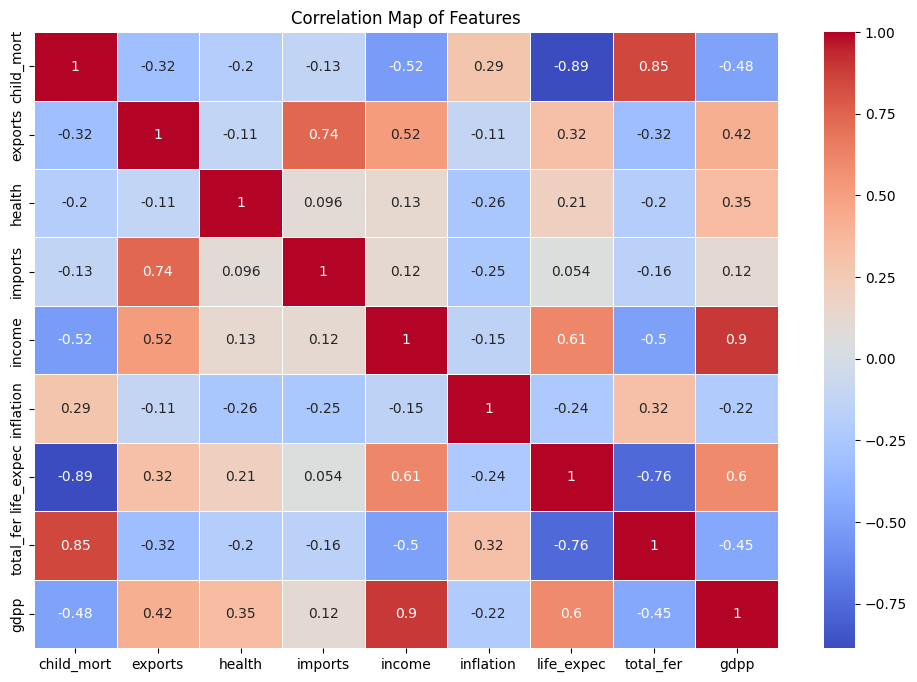

In [9]:
# Create a correlation matrix
correlation_matrix = country_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Map of Features')
plt.show()

Explore the continuous independent features against child_mort using scatter plots.

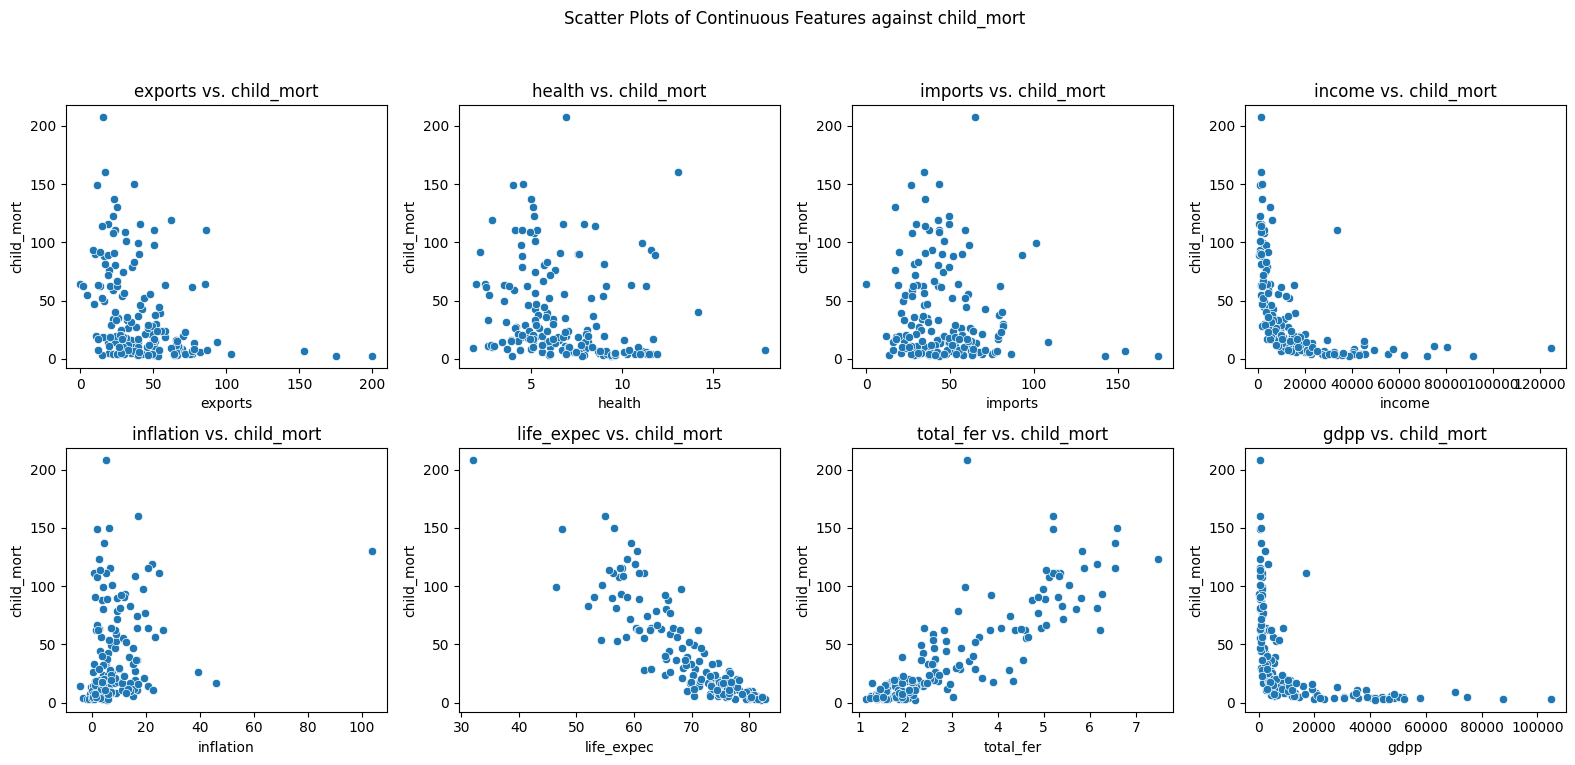

In [10]:
# Define the continuous independent features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Scatter Plots of Continuous Features against child_mort')

# Create scatter plots
for i, feature in enumerate(continuous_features):
    row, col = divmod(i, 4)
    sns.scatterplot(x=country_df[feature], y=country_df['child_mort'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. child_mort')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Explore the continuous independent features against gdpp using scatter plots.

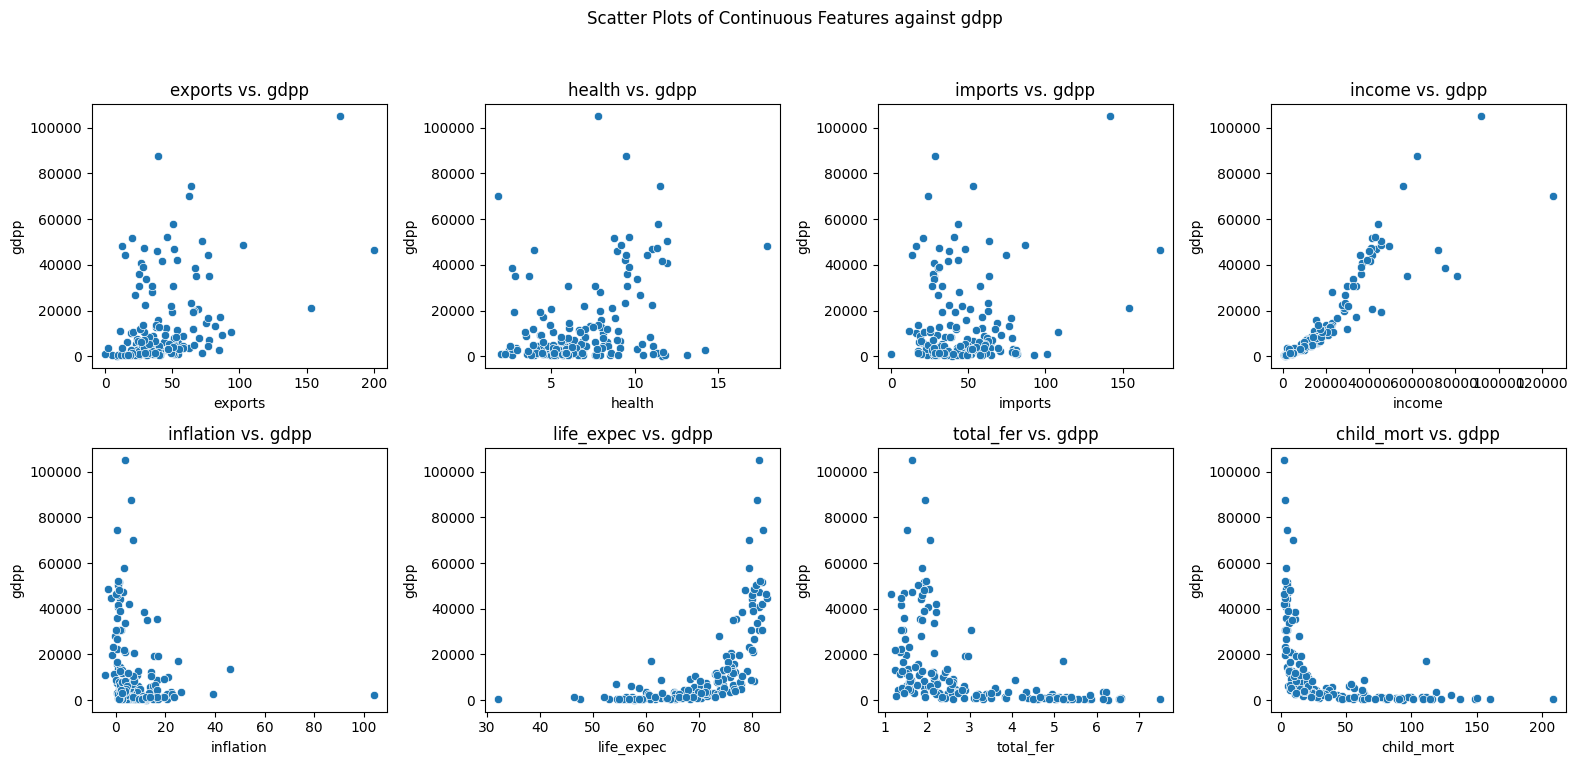

In [11]:
# Define the continuous independent features
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Scatter Plots of Continuous Features against gdpp')

# Create scatter plots
for i, feature in enumerate(continuous_features):
    row, col = divmod(i, 4)
    sns.scatterplot(x=country_df[feature], y=country_df['gdpp'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. gdpp')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Create a pair plot
* Hint: Explore seaborn pairplot

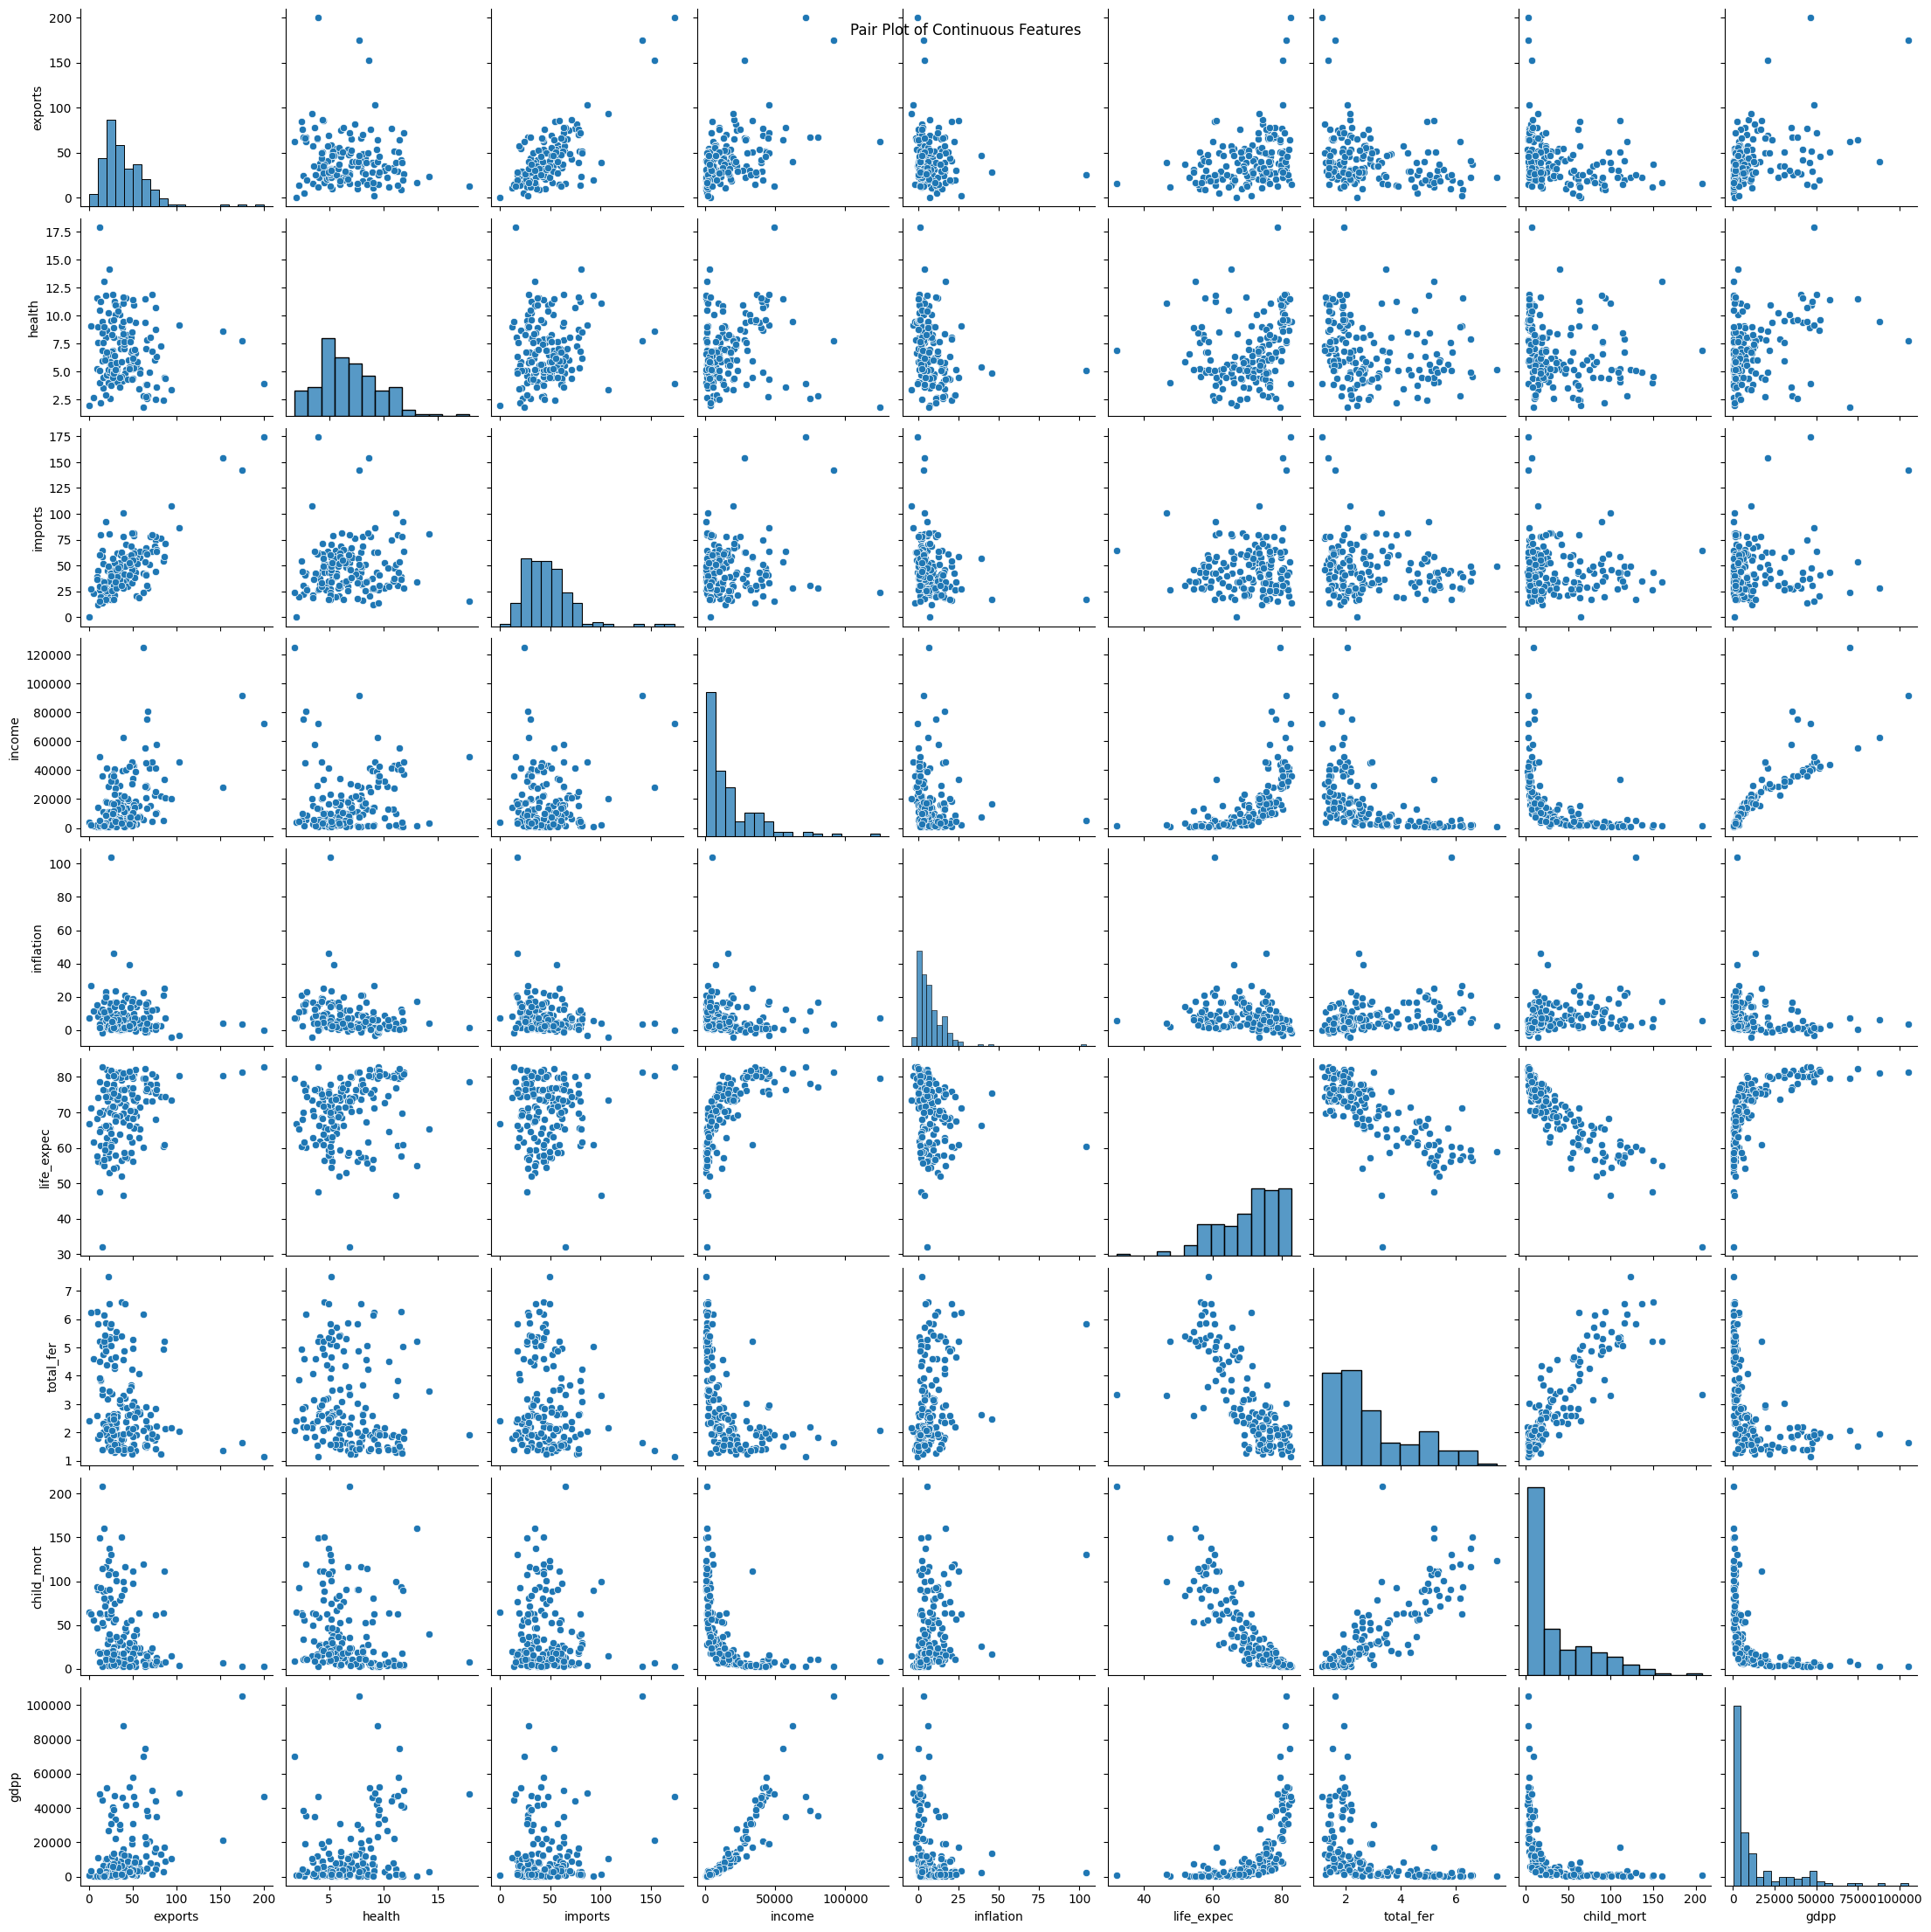

In [12]:
# Select relevant columns for the pair plot
pairplot_columns = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort', 'gdpp']

# Create a pair plot
sns.pairplot(country_df[pairplot_columns])
plt.suptitle('Pair Plot of Continuous Features')
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

Normalise the data using MinMaxScaler

Name the normalised dataframe "df_scaled"


Use df_scaled.head()

In [13]:
# Select the columns to normalize
columns_to_normalize = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort', 'gdpp']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_scaled = country_df.copy()
df_scaled[columns_to_normalize] = scaler.fit_transform(country_df[columns_to_normalize])

# Display the normalized DataFrame
print(df_scaled.head())

                     child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            0.426485  0.049482  0.358608  0.257765  0.008047   
Albania                0.068160  0.139531  0.294593  0.279037  0.074933   
Algeria                0.120253  0.191559  0.146675  0.180149  0.098809   
Angola                 0.566699  0.311125  0.064636  0.246266  0.042535   
Antigua and Barbuda    0.037488  0.227079  0.262275  0.338255  0.148652   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.126144    0.475345   0.736593  0.003073  
Albania               0.080399    0.871795   0.078864  0.036833  
Algeria               0.187691    0.875740   0.274448  0.040365  
Angola                0.245911    0.552268   0.790221  0.031488  
Antigua and Barbuda   0.052213    0.881657   0.154574  0.114242  


## K-Means Clustering

### Selecting K

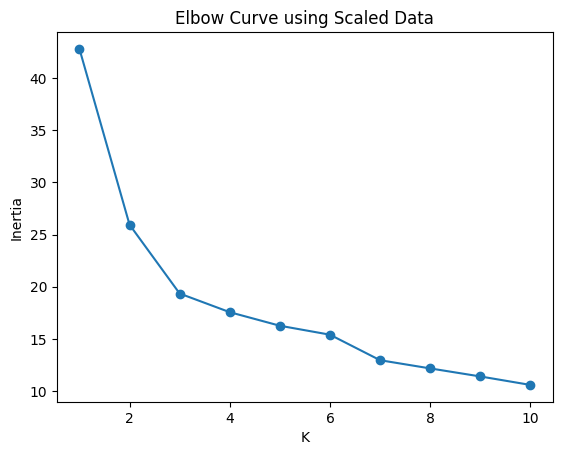

In [14]:
# Define function to evaluate KMeans
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

# Define function to plot elbow curve
def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars, marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve using Scaled Data')
    plt.show()

# Plot elbow curve using scaled data
elbow_Kmeans(df_scaled)


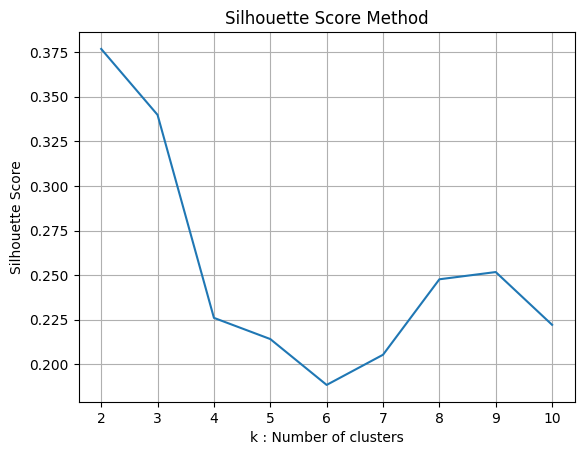

In [15]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

* The elbow curve shows a signinifact decreate in inertia up to K=3, after which the rate of decrease seems to slow down.
* The silhouette score is highest at K=2, even though the silhouette score decreases as K increases, K=2 has the highest score.

Considering both methods, it seems there is a slight discrepancy in the suggested values of K. In such cases, it's common to choose a value that is a good compromise. In our case, we will choose 3.

## Fitting a K-Means Model with the selected K value

In [16]:
# Remember to set the random_state to rseed
chosen_k = 3
random_seed = 42

# Fit K-Means model
kmeans_model = KMeans(n_clusters=chosen_k, random_state=random_seed, max_iter=500)
df_scaled['cluster'] = kmeans_model.fit_predict(df_scaled)

In [17]:
# Count the number of records in each cluster
cluster_counts = df_scaled['cluster'].value_counts()

# Display the number of records in each cluster
print("Number of records in each cluster:")
print(cluster_counts)

Number of records in each cluster:
cluster
0    87
2    45
1    35
Name: count, dtype: int64


In [18]:
# Check model performance with the silhouette coefficient
silhouette_coefficient = silhouette_score(df_scaled.drop('cluster', axis=1), df_scaled['cluster'])
print(f"\nSilhouette Coefficient: {silhouette_coefficient}")


Silhouette Coefficient: 0.33976487765323604


The Silhouette Coefficient of 0.34 suggests that the clusters have somewhat good separation, but there is still room for improvement.<br>
A score closer to 1 indicates good cluster separation. A score of 0.34 is closer to 0 than 1, which means the separation between clusters is not ideal.
However, it's not close to -1 either, indicating that points are not entirely in the wrong clusters.

## Predictions

In [19]:
# Add the predicted cluster label column to the original dataframe
country_df['cluster'] = df_scaled['cluster']

# Display the updated dataframe
print(country_df.sample(5))

            child_mort  exports  health  imports  income  inflation  \
country                                                               
Mongolia          26.1     46.7    5.44     56.7    7710     39.200   
Cape Verde        26.5     32.7    4.09     61.8    5830      0.505   
Ecuador           25.1     27.9    8.06     32.4    9350      7.470   
Malaysia           7.9     86.9    4.39     71.0   21100      7.270   
Bahamas           13.8     35.0    7.89     43.7   22900     -0.393   

            life_expec  total_fer   gdpp  cluster  
country                                            
Mongolia          66.2       2.64   2650        0  
Cape Verde        72.5       2.67   3310        0  
Ecuador           76.7       2.66   4660        0  
Malaysia          74.5       2.15   9070        0  
Bahamas           73.8       1.86  28000        0  


## Visualisation of clusters

Visualisation of clusters: child mortality vs gdpp

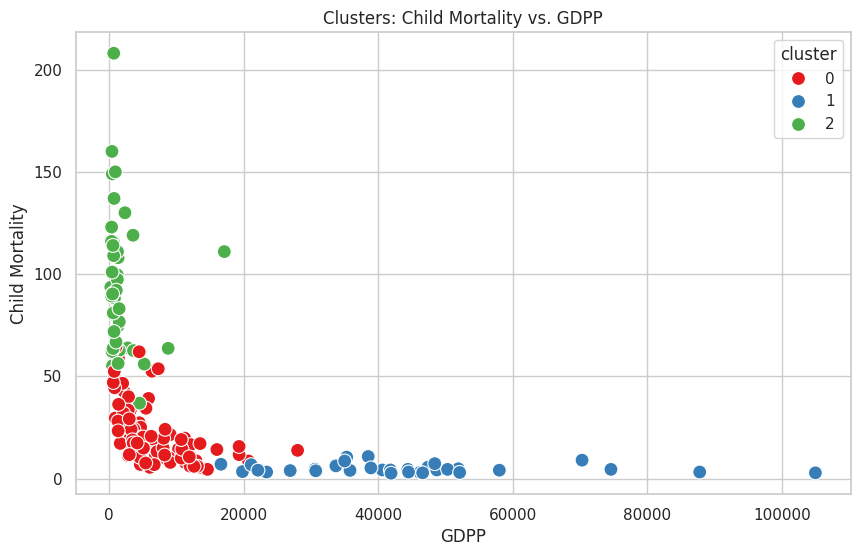

In [22]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster', data=country_df, palette='Set1', legend='full', s=100)
plt.title('Clusters: Child Mortality vs. GDPP')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.show()

Visualisation of clusters: inflation vs gdpp

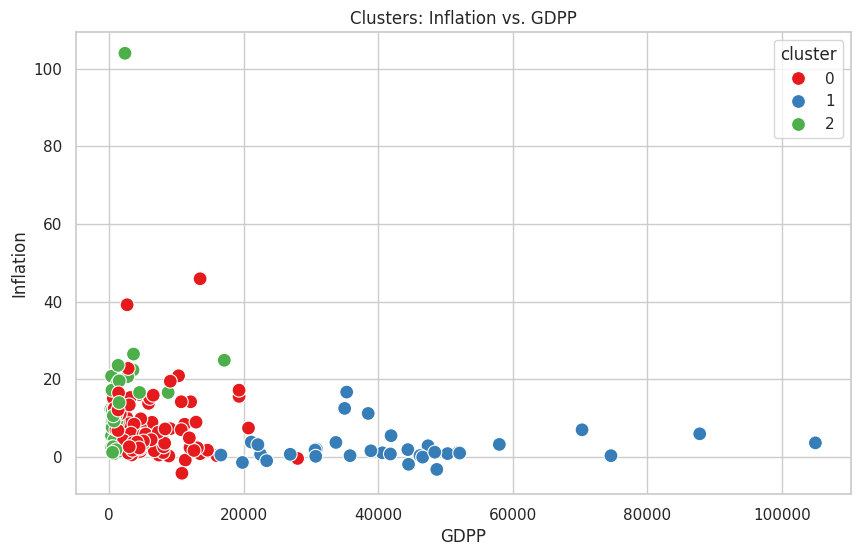

In [23]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdpp', y='inflation', hue='cluster', data=country_df, palette='Set1', legend='full', s=100)
plt.title('Clusters: Inflation vs. GDPP')
plt.xlabel('GDPP')
plt.ylabel('Inflation')
plt.show()

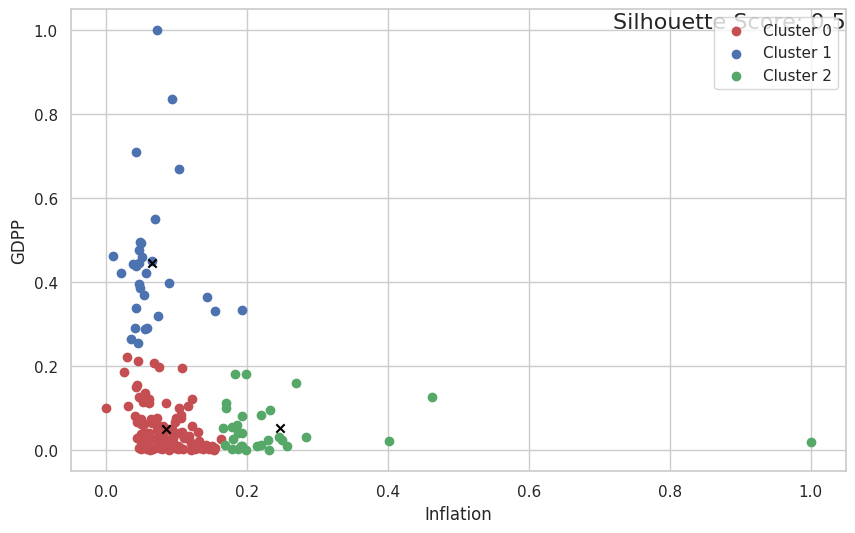

In [24]:
def scatter_Kmeans(x, k, rseed=42):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    
    # Scatter plot with clusters
    plt.figure(figsize=(10, 6))
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c, 1], c=colours[c], label=f'Cluster {c}')
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c='black')

    # Add silhouette score to the title
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)
    plt.title(f'Silhouette Score: {score}', loc='right', fontdict={'fontsize': 16}, pad=-14)
    
    plt.xlabel('Inflation')
    plt.ylabel('GDPP')
    plt.legend()
    plt.show()

# Assuming df_scaled is the normalized DataFrame
scatter_Kmeans(df_scaled[['inflation', 'gdpp']].values, k=3, rseed=42)

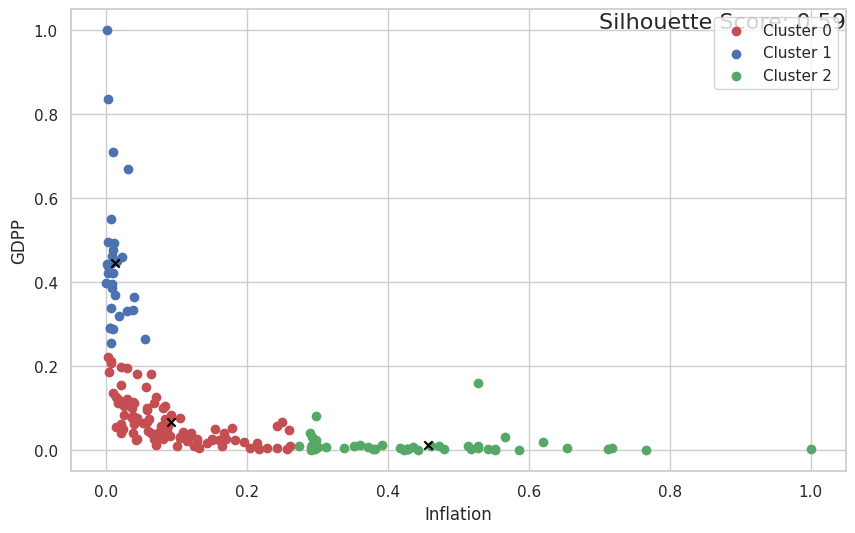

In [25]:
def scatter_Kmeans(x, k, rseed=42):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    
    # Scatter plot with clusters
    plt.figure(figsize=(10, 6))
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c, 1], c=colours[c], label=f'Cluster {c}')
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c='black')

    # Add silhouette score to the title
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)
    plt.title(f'Silhouette Score: {score}', loc='right', fontdict={'fontsize': 16}, pad=-14)
    
    plt.xlabel('Inflation')
    plt.ylabel('GDPP')
    plt.legend()
    plt.show()


scatter_Kmeans(df_scaled[['child_mort', 'gdpp']].values, k=3, rseed=42)

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**


Cluster 0 Characteristics:
Average Child Mortality: 0.10
Average GDPP: 0.06
Average Inflation: 0.11

Cluster 1 Characteristics:
Average Child Mortality: 0.01
Average GDPP: 0.41
Average Inflation: 0.06

Cluster 2 Characteristics:
Average Child Mortality: 0.45
Average GDPP: 0.01
Average Inflation: 0.15


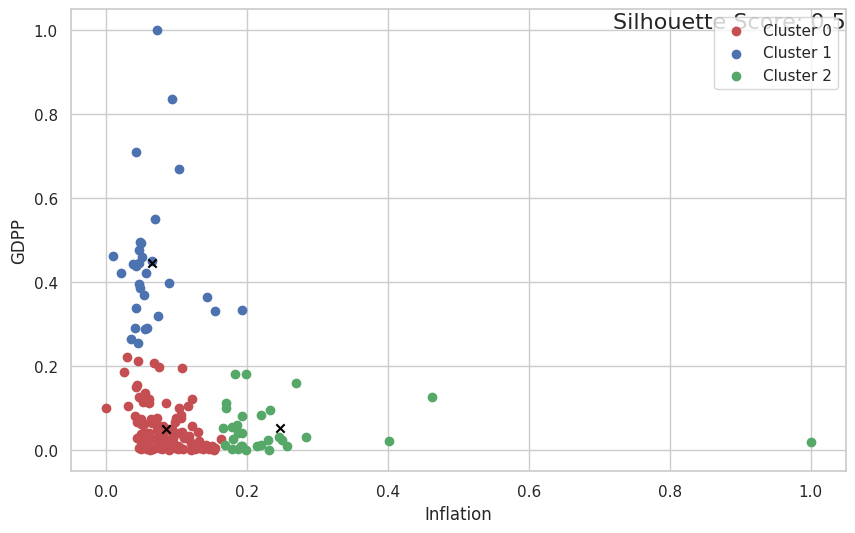

In [26]:
def scatter_Kmeans_with_labels(x, k, rseed=42):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    
    # Scatter plot with clusters
    plt.figure(figsize=(10, 6))
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c, 1], c=colours[c], label=f'Cluster {c}')
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c='black')

    # Add silhouette score to the title
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)
    plt.title(f'Silhouette Score: {score}', loc='right', fontdict={'fontsize': 16}, pad=-14)
    
    plt.xlabel('Inflation')
    plt.ylabel('GDPP')
    plt.legend()

    # Assign labels based on characteristics of each cluster
    for i in range(k):
        child_mort_avg = df_scaled.loc[df_scaled['cluster'] == i, 'child_mort'].mean()
        gdpp_avg = df_scaled.loc[df_scaled['cluster'] == i, 'gdpp'].mean()
        inflation_avg = df_scaled.loc[df_scaled['cluster'] == i, 'inflation'].mean()

        print(f'\nCluster {i} Characteristics:')
        print(f'Average Child Mortality: {child_mort_avg:.2f}')
        print(f'Average GDPP: {gdpp_avg:.2f}')
        print(f'Average Inflation: {inflation_avg:.2f}')

    plt.show()

# Assuming df_scaled is the normalized DataFrame
scatter_Kmeans_with_labels(df_scaled[['inflation', 'gdpp']].values, k=3, rseed=42)



## Cluster Interpretations

| Cluster | Child Mortality | GDPP | Inflation | Interpretation | Label |
|---|---|---|---|---|---|
| 0 | Low | Low | Moderate | This cluster represents countries with low child mortality, low GDPP, and moderate inflation. | Low GDPP, Low Child Mortality, Moderate Inflation |
| 1 | Very Low | Moderate | Low | This cluster represents countries with very low child mortality, moderate GDPP, and low inflation. | Moderate GDPP, Very Low Child Mortality, Low Inflation |
| 2 | High | Very Low | High | This cluster represents countries with high child mortality, very low GDPP, and high inflation. | Very Low GDPP, High Child Mortality, High Inflation |
